# Topic research
## Author - gromdimon
## 01.06.2023


## Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Locating data

In [3]:
import os
for dirname, _, filenames in os.walk('long_covid2'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


long_covid2/twitter/long7/data_1439798676474445830.json
long_covid2/twitter/long7/users_1423973486486228992.json
long_covid2/twitter/long7/users_1431500801663541248.json
long_covid2/twitter/long7/users_1457033680266932224.json
long_covid2/twitter/long7/users_1393195106954584068.json
long_covid2/twitter/long7/data_1448217396272115713.json
long_covid2/twitter/long7/data_1449658904405815298.json
long_covid2/twitter/long7/users_1444727584223285248.json
long_covid2/twitter/long7/users_1449860868016152583.json
long_covid2/twitter/long7/data_1446957932311162887.json
long_covid2/twitter/long7/users_1435347682634174471.json
long_covid2/twitter/long7/users_1450372662040072196.json
long_covid2/twitter/long7/users_1448998259293364224.json
long_covid2/twitter/long7/users_1446574332671676429.json
long_covid2/twitter/long7/users_1420096700291633161.json
long_covid2/twitter/long7/data_1400758956952260610.json
long_covid2/twitter/long7/users_1422163618821509122.json
long_covid2/twitter/long7/data_14132

In [4]:
# Stopwords
with open('stopwords-de.txt', 'r') as f:
    stopwords = f.read().splitlines()

if len(stopwords) != len(set(stopwords)):
    print('There are duplicates in the stopwords list')
else:
    print('There are no duplicates in the stopwords list')

print('Number of stopwords: ', len(stopwords))

stopwords = [word.lower() for word in stopwords]

There are no duplicates in the stopwords list
Number of stopwords:  620


## Example text analysis

In [5]:
!pip install openpyxl
df = pd.read_excel('long_covid2/event_registry/articles_LC_1.xlsx')
display(df.head())

,Unique ID (URI),URL,Publish date,Publish time,Source URI,Source title,Language,Article title,Article body
0,7469268348,https://www.gmx.at/magazine/gesundheit/histami...,2023-03-28,10:34:00,gmx.at,GMX News,deu,Mastzellaktivierungssyndrom - Was steckt dahin...,Das Mastzellaktivierungssyndrom - kurz MCAS - ...
1,7469260258,https://www.gmx.ch/magazine/gesundheit/histami...,2023-03-28,10:30:00,gmx.ch,GMX News,deu,Mastzellaktivierungssyndrom - Was steckt dahin...,Das Mastzellaktivierungssyndrom - kurz MCAS - ...
2,7469069144,https://www.finanznachrichten.de/nachrichten-2...,2023-03-28,08:38:00,finanznachrichten.de,FinanzNachrichten.de,deu,12 Nominierte für den größten deutschen Medien...,Berlin (ots) - 12 potenzielle Gewinnerinnen un...
3,7468754872,https://www.augsburger-allgemeine.de/mindelhei...,2023-03-28,04:44:00,augsburger-allgemeine.de,Augsburger Allgemeine,deu,Durch Long-Covid entdeckte Ingo Pelzer sein Ta...,Die Folgen einer Corona-Erkrankung werfen Ingo...
4,7468716366,https://m.noen.at/horn/im-gespraech-wird-schwi...,2023-03-28,04:08:00,m.noen.at,m.noen.at,deu,"""Wird schwierig, sind aber auf gutem Weg""",NÖN: Die Kritik an der Übereinkunft zwischen Ö...


In [15]:
merged_df = pd.DataFrame()

# Combine all the data into one dataframe
for dirname, _, filenames in os.walk('long_covid2/event_registry'):
    for filename in filenames:
        df_temp = pd.read_excel(os.path.join(dirname, filename))
        merged_df = pd.concat([merged_df, df_temp], ignore_index=True)

display(merged_df.head())

,Unique ID (URI),URL,Publish date,Publish time,Source URI,Source title,Language,Article title,Article body
0,6750622589,https://idw-online.de/de/event69687,2021-09-30,22:38:00,idw-online.de,Informationdienst Wissenschaft e.V. - idw,deu,Deutscher Schmerzkongress 2021: Wissen schaffe...,+++ Chronische Kopfschmerzen bei Kindern +++ S...
1,6750622704,https://idw-online.de/de/event69578,2021-09-30,22:33:00,idw-online.de,Informationdienst Wissenschaft e.V. - idw,deu,Update Schutzimpfungen und COVID-19,Aufgrund anhaltender hoher Nachfrage bieten wi...
2,6750564304,https://www.n-tv.de/panorama/23-18-Maskenverwe...,2021-09-30,21:22:00,n-tv.de,N-tv,deu,Coronavirus-Liveticker: +++ 23:18 Maskenverwei...,Ein Maskenverweigerer hat in Dortmund einen Ki...
3,6750521381,https://www.n-tv.de/panorama/22-31-Kurz-nach-W...,2021-09-30,20:35:00,n-tv.de,N-tv,deu,Coronavirus-Liveticker: +++ 22:31 Kurz nach Wi...,Nur einen Tag nach der Wiedereröffnung muss da...
4,6750514947,https://www.n-tv.de/panorama/22-03-Sloweniens-...,2021-09-30,20:29:00,n-tv.de,N-tv,deu,Coronavirus-Liveticker: +++ 22:03 Sloweniens V...,Sloweniens Verfassungsgericht stoppt eine Coro...


In [22]:
# Export df
merged_df.to_csv('long_covid2/event_registry/articles_LC_all.csv', index=False)

In [23]:
df_report = pd.read_excel('long_covid2/brand24/long-covid_report_2023-03-30_15.55.xlsx', header=1)
display(df_report.head())

,Unnamed: 0,ID,Date,Hrs,Title,Content,Source,Domain,Category,Sentiment,Tags
0,NaN,69471821207,2023-03-30,06:38,NaN,NaN,Tweet-ID: 1641434640073228289,twitter.com,Twitter,0.0,NaN
1,NaN,69471461501,2023-03-30,06:36,NaN,NaN,Tweet-ID: 1641434159108489219,twitter.com,Twitter,0.0,NaN
2,NaN,69471821215,2023-03-30,06:32,NaN,NaN,Tweet-ID: 1641433328711766017,twitter.com,Twitter,0.0,NaN
3,NaN,69471821220,2023-03-30,06:27,NaN,NaN,Tweet-ID: 1641431903831216128,twitter.com,Twitter,-1.0,NaN
4,NaN,69471821228,2023-03-30,06:13,NaN,NaN,Tweet-ID: 1641428508436996096,twitter.com,Twitter,0.0,NaN


In [24]:
df_report.drop(['Unnamed: 0', 'Tags'], axis=1, inplace=True)
display(df_report.head())

,ID,Date,Hrs,Title,Content,Source,Domain,Category,Sentiment
0,69471821207,2023-03-30,06:38,NaN,NaN,Tweet-ID: 1641434640073228289,twitter.com,Twitter,0.0
1,69471461501,2023-03-30,06:36,NaN,NaN,Tweet-ID: 1641434159108489219,twitter.com,Twitter,0.0
2,69471821215,2023-03-30,06:32,NaN,NaN,Tweet-ID: 1641433328711766017,twitter.com,Twitter,0.0
3,69471821220,2023-03-30,06:27,NaN,NaN,Tweet-ID: 1641431903831216128,twitter.com,Twitter,-1.0
4,69471821228,2023-03-30,06:13,NaN,NaN,Tweet-ID: 1641428508436996096,twitter.com,Twitter,0.0


In [25]:
display(merged_df.head())

,Unique ID (URI),URL,Publish date,Publish time,Source URI,Source title,Language,Article title,Article body
0,6750622589,https://idw-online.de/de/event69687,2021-09-30,22:38:00,idw-online.de,Informationdienst Wissenschaft e.V. - idw,deu,Deutscher Schmerzkongress 2021: Wissen schaffe...,+++ Chronische Kopfschmerzen bei Kindern +++ S...
1,6750622704,https://idw-online.de/de/event69578,2021-09-30,22:33:00,idw-online.de,Informationdienst Wissenschaft e.V. - idw,deu,Update Schutzimpfungen und COVID-19,Aufgrund anhaltender hoher Nachfrage bieten wi...
2,6750564304,https://www.n-tv.de/panorama/23-18-Maskenverwe...,2021-09-30,21:22:00,n-tv.de,N-tv,deu,Coronavirus-Liveticker: +++ 23:18 Maskenverwei...,Ein Maskenverweigerer hat in Dortmund einen Ki...
3,6750521381,https://www.n-tv.de/panorama/22-31-Kurz-nach-W...,2021-09-30,20:35:00,n-tv.de,N-tv,deu,Coronavirus-Liveticker: +++ 22:31 Kurz nach Wi...,Nur einen Tag nach der Wiedereröffnung muss da...
4,6750514947,https://www.n-tv.de/panorama/22-03-Sloweniens-...,2021-09-30,20:29:00,n-tv.de,N-tv,deu,Coronavirus-Liveticker: +++ 22:03 Sloweniens V...,Sloweniens Verfassungsgericht stoppt eine Coro...


In [32]:
display(df_report.head(3))
display(merged_df.head(3))

,id,title,content,source,domain,category,sentiment,publish_time
0,69471821207,NaN,NaN,Tweet-ID: 1641434640073228289,twitter.com,Twitter,0.0,2023-03-30 06:38:00
1,69471461501,NaN,NaN,Tweet-ID: 1641434159108489219,twitter.com,Twitter,0.0,2023-03-30 06:36:00
2,69471821215,NaN,NaN,Tweet-ID: 1641433328711766017,twitter.com,Twitter,0.0,2023-03-30 06:32:00


,id,url,source,domain,language,title,content,publish_time
0,6750622589,https://idw-online.de/de/event69687,idw-online.de,Informationdienst Wissenschaft e.V. - idw,deu,Deutscher Schmerzkongress 2021: Wissen schaffe...,+++ Chronische Kopfschmerzen bei Kindern +++ S...,2021-09-30 22:38:00
1,6750622704,https://idw-online.de/de/event69578,idw-online.de,Informationdienst Wissenschaft e.V. - idw,deu,Update Schutzimpfungen und COVID-19,Aufgrund anhaltender hoher Nachfrage bieten wi...,2021-09-30 22:33:00
2,6750564304,https://www.n-tv.de/panorama/23-18-Maskenverwe...,n-tv.de,N-tv,deu,Coronavirus-Liveticker: +++ 23:18 Maskenverwei...,Ein Maskenverweigerer hat in Dortmund einen Ki...,2021-09-30 21:22:00


In [31]:
# make datatime column
df_report['publish_time'] = pd.to_datetime(df_report['Date'] + ' ' + df_report['Hrs'])
merged_df['publish_time'] = pd.to_datetime(merged_df['Publish date'] + ' ' + merged_df['Publish time'])

# drop date and time columns
df_report.drop(['Date', 'Hrs'], axis=1, inplace=True)
merged_df.drop(['Publish date', 'Publish time'], axis=1, inplace=True)

# Rename columns
df_report.rename(columns={
    'ID': 'id', 
    'Title': 'title', 
    'Content': 'content', 
    'Source': 'source', 
    'Domain': 'domain', 
    'Category': 'category', 
    'Sentiment': 'sentiment'
    }, inplace=True)
merged_df.rename(columns={
    'Unique ID (URI)': 'id', 
    'URL': 'url',
    'Source URI': 'source', 
    'Source title': 'domain',
    'Language': 'language',
    'Article title': 'title',
    'Article body': 'content',
    }, inplace=True)

In [50]:
# Merge the two dataframes
df = pd.concat([df_report, merged_df], ignore_index=True)
print(df.shape)
display(df.head())

(47487, 10)


,id,title,content,source,domain,category,sentiment,publish_time,url,language
0,69471821207,NaN,NaN,Tweet-ID: 1641434640073228289,twitter.com,Twitter,0.0,2023-03-30 06:38:00,NaN,NaN
1,69471461501,NaN,NaN,Tweet-ID: 1641434159108489219,twitter.com,Twitter,0.0,2023-03-30 06:36:00,NaN,NaN
2,69471821215,NaN,NaN,Tweet-ID: 1641433328711766017,twitter.com,Twitter,0.0,2023-03-30 06:32:00,NaN,NaN
3,69471821220,NaN,NaN,Tweet-ID: 1641431903831216128,twitter.com,Twitter,-1.0,2023-03-30 06:27:00,NaN,NaN
4,69471821228,NaN,NaN,Tweet-ID: 1641428508436996096,twitter.com,Twitter,0.0,2023-03-30 06:13:00,NaN,NaN


In [51]:
check_missing_values_and_duplicates(df)

Total and Percentage of NaN & Duplicates:
            Total   Percent Duplicates
sentiment  36439  0.767347        NaN
category   36413  0.766799        NaN
url        11074  0.233201        NaN
language   11074  0.233201        NaN
title       6176  0.130057        NaN
content     6176  0.130057        NaN
source       297  0.006254        NaN


In [56]:
# See duplicates in content column
duplicated = df[df.duplicated(subset=['content'], keep=False)].sort_values(by='content')
print(duplicated.shape)
display(duplicated.head(3))

# See duplicates in content column and title
duplicated = df[df.duplicated(subset=['content', 'title'], keep=False)].sort_values(by='content')
print(duplicated.shape)
display(duplicated.head(3))

# values in content column
df['content'].value_counts()

(26867, 10)


,id,title,content,source,domain,category,sentiment,publish_time,url,language
26274,6975686610,Corona-Pandemie: Drosten: Hochinzidenzphase kö...,"""Aktuell sind wir auch in einer Hochinzidenzph...",aachener-nachrichten.de,Aachener Nachrichten,NaN,NaN,2022-03-23 13:16:00,https://www.aachener-nachrichten.de/wissenscha...,deu
26269,6975704811,Corona-Pandemie: Drosten: Hochinzidenzphase kö...,"""Aktuell sind wir auch in einer Hochinzidenzph...",saarbruecker-zeitung.de,Saarbrücker Zeitung,NaN,NaN,2022-03-23 13:28:00,https://www.saarbruecker-zeitung.de/saarland/h...,deu
26297,6975642185,Corona-Pandemie: Drosten: Hochinzidenzphase kö...,"""Aktuell sind wir auch in einer Hochinzidenzph...",aachener-zeitung.de,Aachener Zeitung,NaN,NaN,2022-03-23 12:42:00,https://www.aachener-zeitung.de/wissenschaft/d...,deu


(22766, 10)


,id,title,content,source,domain,category,sentiment,publish_time,url,language
26269,6975704811,Corona-Pandemie: Drosten: Hochinzidenzphase kö...,"""Aktuell sind wir auch in einer Hochinzidenzph...",saarbruecker-zeitung.de,Saarbrücker Zeitung,NaN,NaN,2022-03-23 13:28:00,https://www.saarbruecker-zeitung.de/saarland/h...,deu
26274,6975686610,Corona-Pandemie: Drosten: Hochinzidenzphase kö...,"""Aktuell sind wir auch in einer Hochinzidenzph...",aachener-nachrichten.de,Aachener Nachrichten,NaN,NaN,2022-03-23 13:16:00,https://www.aachener-nachrichten.de/wissenscha...,deu
26297,6975642185,Corona-Pandemie: Drosten: Hochinzidenzphase kö...,"""Aktuell sind wir auch in einer Hochinzidenzph...",aachener-zeitung.de,Aachener Zeitung,NaN,NaN,2022-03-23 12:42:00,https://www.aachener-zeitung.de/wissenschaft/d...,deu


Eine Corona-Impfung schützt vor schweren Krankheitsverläufen oder lässt die Krankheit gar nicht erst ausbrechen. Doch gilt das auch für Omikron? Aktuell steckt sich gefühlt jeder mit Omikron an. Die Corona-Variante hat nach aktuellem Wissensstand leichtere Krankheitsverläufe* zur Folge, ist ...         145
Hier können Sie interessante Artikel speichern, um sie später zu lesen und wiederzufinden. Jetzt registrieren / einloggen Der Erreger Sars-CoV-2, der die Krankheit Covid-19 auslösen kann, sorgt in München, Bayern und Deutschland seit Monaten für teils drastische Maßnahmen. In unserem Newsblog ...       135
Hier können Sie interessante Artikel speichern, um sie später zu lesen und wiederzufinden. Jetzt registrieren / einloggen Der Erreger Sars-CoV-2, der die Krankheit Covid-19 auslösen kann, sorgt in München, Bayern und Deutschland seit nun mehr rund zweieinhalb Jahren für teils drastische ...              84
Das Impfpflicht-Aus in Deutschland könnte zu neuen Beschränkungen im Herbst 

In [54]:
# Drop duplicates
print(df.shape)
new_df = df.drop_duplicates(subset=['id'])
print(new_df.shape)
new_df.drop_duplicates(subset=['content'], inplace=True)
print(new_df.shape)
new_df.drop_duplicates(subset=['title'], inplace=True)
print(new_df.shape)

# Drop rows with missing values in content column
new_df.dropna(subset=['content'], inplace=True)
print(new_df.shape)

check_missing_values_and_duplicates(new_df)

(47487, 10)
(47487, 10)
(25328, 10)
(21398, 10)
(21397, 10)
Total and Percentage of NaN & Duplicates:
            Total   Percent Duplicates
sentiment  17595  0.822312        NaN
category   17585  0.821844        NaN
url         3812  0.178156        NaN
language    3812  0.178156        NaN


In [58]:
# Export df and new_df
df.to_csv('long_covid2/records_and_brand24_full.csv', index=False)
new_df.to_csv('long_covid2/records_and_brand24_clean.csv', index=False)


### Small EDA

In [34]:
def check_missing_values_and_duplicates(dataframe):
    if dataframe.isnull().sum().sum() > 0 or dataframe.isnull().sum().sum() > 0:
        m_total = dataframe.isnull().sum().sort_values(ascending=False)
        total = m_total[m_total > 0]

        m_percent = dataframe.isnull().mean().sort_values(ascending=False)
        percent = m_percent[m_percent > 0]

        m_duplicates = dataframe.duplicated().sort_values(ascending=False)
        duplicates = m_duplicates[m_duplicates > 0]

        missing_data = pd.concat([total, percent, duplicates], axis=1, keys=['Total', 'Percent', 'Duplicates'])

        print(f'Total and Percentage of NaN & Duplicates:\n {missing_data}')
    else:
        print('No NaN or Duplicate found.')

In [10]:
check_missing_values_and_duplicates(df)

No NaN or Duplicate found.


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unique ID (URI)  662 non-null    int64 
 1   URL              662 non-null    object
 2   Publish date     662 non-null    object
 3   Publish time     662 non-null    object
 4   Source URI       662 non-null    object
 5   Source title     662 non-null    object
 6   Language         662 non-null    object
 7   Article title    662 non-null    object
 8   Article body     662 non-null    object
dtypes: int64(1), object(8)
memory usage: 46.7+ KB


In [12]:
df['publish_date'] = pd.to_datetime(df['Publish date'])
df['publish_time'] = pd.to_datetime(df['Publish date'] + ' ' + df['Publish time'])
display(df.head(2))

,Unique ID (URI),URL,Publish date,Publish time,Source URI,Source title,Language,Article title,Article body,publish_date,publish_time
0,7469268348,https://www.gmx.at/magazine/gesundheit/histami...,2023-03-28,10:34:00,gmx.at,GMX News,deu,Mastzellaktivierungssyndrom - Was steckt dahin...,Das Mastzellaktivierungssyndrom - kurz MCAS - ...,2023-03-28,2023-03-28 10:34:00
1,7469260258,https://www.gmx.ch/magazine/gesundheit/histami...,2023-03-28,10:30:00,gmx.ch,GMX News,deu,Mastzellaktivierungssyndrom - Was steckt dahin...,Das Mastzellaktivierungssyndrom - kurz MCAS - ...,2023-03-28,2023-03-28 10:30:00


*Take a look on time hour snippets*

In [13]:
# df.drop(['Publish date', 'Publish time'], axis=1, inplace=True)
display(df.head(3))

,Unique ID (URI),URL,Publish date,Publish time,Source URI,Source title,Language,Article title,Article body,publish_date,publish_time
0,7469268348,https://www.gmx.at/magazine/gesundheit/histami...,2023-03-28,10:34:00,gmx.at,GMX News,deu,Mastzellaktivierungssyndrom - Was steckt dahin...,Das Mastzellaktivierungssyndrom - kurz MCAS - ...,2023-03-28,2023-03-28 10:34:00
1,7469260258,https://www.gmx.ch/magazine/gesundheit/histami...,2023-03-28,10:30:00,gmx.ch,GMX News,deu,Mastzellaktivierungssyndrom - Was steckt dahin...,Das Mastzellaktivierungssyndrom - kurz MCAS - ...,2023-03-28,2023-03-28 10:30:00
2,7469069144,https://www.finanznachrichten.de/nachrichten-2...,2023-03-28,08:38:00,finanznachrichten.de,FinanzNachrichten.de,deu,12 Nominierte für den größten deutschen Medien...,Berlin (ots) - 12 potenzielle Gewinnerinnen un...,2023-03-28,2023-03-28 08:38:00


In [14]:
# See values throwout the columns
# Source URI
print('Source URI:')
display(df['Source URI'].value_counts())

# Language
print('Language:')
display(df['Language'].value_counts())

Source URI:


finanznachrichten.de    19
sueddeutsche.de         16
tz.de                   14
merkur.de               14
kreiszeitung.de         14
                        ..
luzernerzeitung.ch       1
usanews-24.com           1
radio-plassenburg.de     1
news.de                  1
nw.de                    1
Name: Source URI, Length: 184, dtype: int64

Language:


deu    662
Name: Language, dtype: int64

In [15]:
# Calculate min, max and average length of the articles
df['text_length'] = df['Article body'].apply(lambda x: len(x))
print('Min length: ', df['text_length'].min())
print('Max length: ', df['text_length'].max())
print('Average length: ', df['text_length'].mean())

Min length:  279
Max length:  303
Average length:  295.52416918429003


In [16]:
# Datetime columns
print('Publish date:')
print(df['publish_date'].describe(datetime_is_numeric=True))
print(df['publish_date'].min())
print(df['publish_date'].max())

print('Publish time:')
print(df['publish_time'].describe(datetime_is_numeric=True))
print(df['publish_time'].min())
print(df['publish_time'].max())


Publish date:
count                              662
mean     2023-03-12 13:07:25.921450240
min                2023-02-25 00:00:00
25%                2023-03-04 00:00:00
50%                2023-03-14 00:00:00
75%                2023-03-20 00:00:00
max                2023-03-28 00:00:00
Name: publish_date, dtype: object
2023-02-25 00:00:00
2023-03-28 00:00:00
Publish time:
count                              662
mean     2023-03-13 00:35:26.646525696
min                2023-02-25 04:21:00
25%                2023-03-04 10:55:15
50%                2023-03-14 04:36:00
75%                2023-03-20 09:20:30
max                2023-03-28 10:34:00
Name: publish_time, dtype: object
2023-02-25 04:21:00
2023-03-28 10:34:00


Histogram of publish_time


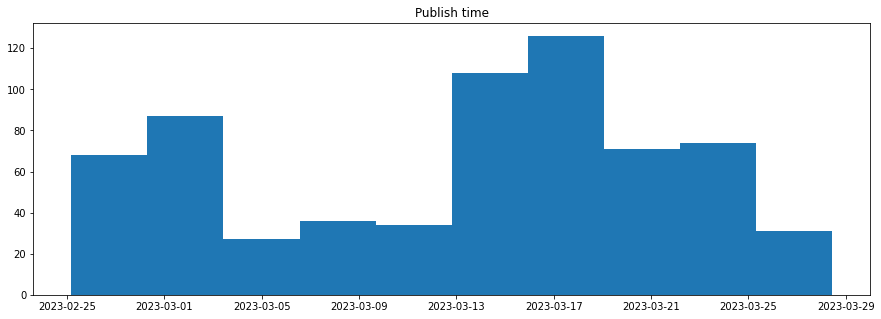

Plot of publish_time and text_length


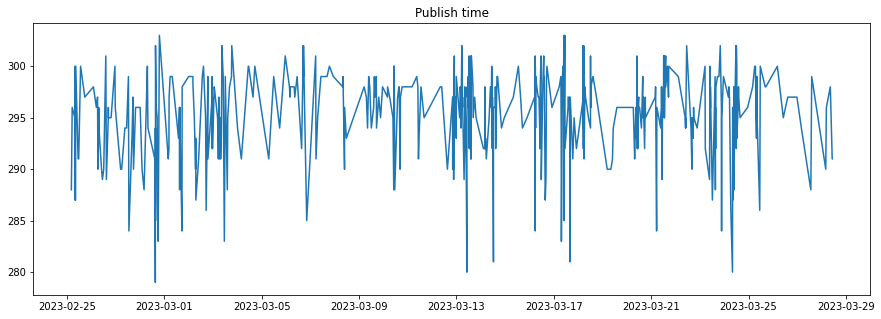

In [17]:
# Plotting the datetime publish_time
print('Histogram of publish_time')
plt.figure(figsize=(15, 5))
plt.title('Publish time')
plt.hist(df['publish_time'], bins=10)
plt.show()

print('Plot of publish_time and text_length')
plt.figure(figsize=(15, 5))
plt.title('Publish time')
plt.plot(df['publish_time'], df['text_length'])
plt.show()

In [18]:
# Investigating the text
# Calculate the number of occurrences of words from stopwords in the Article body
df['stopwords_count'] = df['Article body'].apply(lambda x: len([word for word in x.split() if word.lower() in stopwords]))
print('Min stopwords count: ', df['stopwords_count'].min())
print('Max stopwords count: ', df['stopwords_count'].max())
print('Average stopwords count: ', df['stopwords_count'].mean())
display(df.head(3))

Min stopwords count:  6
Max stopwords count:  32
Average stopwords count:  19.400302114803626


,Unique ID (URI),URL,Publish date,Publish time,Source URI,Source title,Language,Article title,Article body,publish_date,publish_time,text_length,stopwords_count
0,7469268348,https://www.gmx.at/magazine/gesundheit/histami...,2023-03-28,10:34:00,gmx.at,GMX News,deu,Mastzellaktivierungssyndrom - Was steckt dahin...,Das Mastzellaktivierungssyndrom - kurz MCAS - ...,2023-03-28,2023-03-28 10:34:00,291,19
1,7469260258,https://www.gmx.ch/magazine/gesundheit/histami...,2023-03-28,10:30:00,gmx.ch,GMX News,deu,Mastzellaktivierungssyndrom - Was steckt dahin...,Das Mastzellaktivierungssyndrom - kurz MCAS - ...,2023-03-28,2023-03-28 10:30:00,291,19
2,7469069144,https://www.finanznachrichten.de/nachrichten-2...,2023-03-28,08:38:00,finanznachrichten.de,FinanzNachrichten.de,deu,12 Nominierte für den größten deutschen Medien...,Berlin (ots) - 12 potenzielle Gewinnerinnen un...,2023-03-28,2023-03-28 08:38:00,298,11


Histogram of stopwords_count


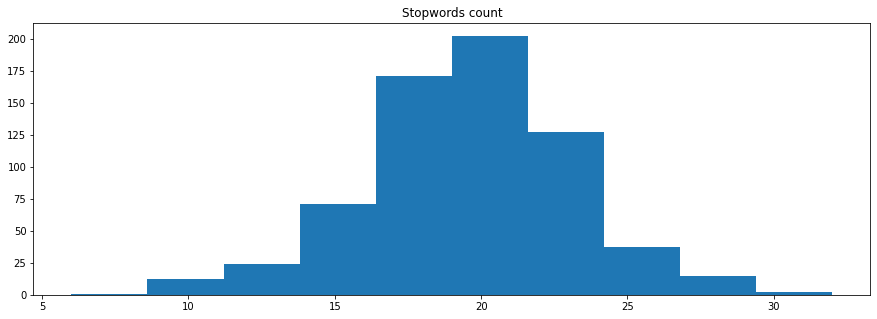

Plot of stopwords_count and text_length


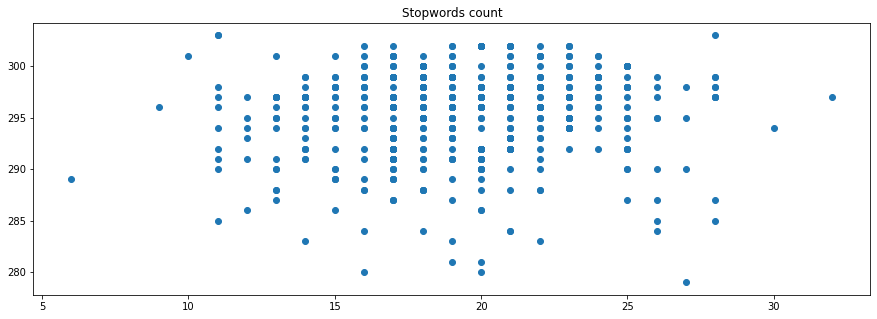

In [19]:
# Plotting the stopwords_count
print('Histogram of stopwords_count')
plt.figure(figsize=(15, 5))
plt.title('Stopwords count')
plt.hist(df['stopwords_count'], bins=10)
plt.show()

print('Plot of stopwords_count and text_length')
plt.figure(figsize=(15, 5))
plt.title('Stopwords count')
plt.plot(df['stopwords_count'], df['text_length'], 'o')
plt.show()

In [20]:
df.head(2)

,Unique ID (URI),URL,Publish date,Publish time,Source URI,Source title,Language,Article title,Article body,publish_date,publish_time,text_length,stopwords_count
0,7469268348,https://www.gmx.at/magazine/gesundheit/histami...,2023-03-28,10:34:00,gmx.at,GMX News,deu,Mastzellaktivierungssyndrom - Was steckt dahin...,Das Mastzellaktivierungssyndrom - kurz MCAS - ...,2023-03-28,2023-03-28 10:34:00,291,19
1,7469260258,https://www.gmx.ch/magazine/gesundheit/histami...,2023-03-28,10:30:00,gmx.ch,GMX News,deu,Mastzellaktivierungssyndrom - Was steckt dahin...,Das Mastzellaktivierungssyndrom - kurz MCAS - ...,2023-03-28,2023-03-28 10:30:00,291,19


### Results
After the small EDA we can see that:
- There are 11 columns totally
- Meaningfully columns are: 'URL', 'Article title', 'Article body', 'publish_time', 'text_length', 'stopwords_count'
- All the articles are in german (so Language column is redundant)
- The articles are published from 2023-02 to 2023-03
- There are 184 sources of the articles, some of them combine several articles (finanznachrichten.de)
- The average length of the articles is about 300 symbols
- The average number of stopwords in the articles is about 20
- The number of stopwords in the articles is not correlated with the length of the articles and moreover has a pretty distribution

## Example covid report analysis

In [21]:
df_report = pd.read_excel('long_covid2/brand24/long-covid_report_2023-03-30_15.55.xlsx', header=1)
display(df_report.head())

,Unnamed: 0,ID,Date,Hrs,Title,Content,Source,Domain,Category,Sentiment,Tags
0,NaN,69471821207,2023-03-30,06:38,NaN,NaN,Tweet-ID: 1641434640073228289,twitter.com,Twitter,0.0,NaN
1,NaN,69471461501,2023-03-30,06:36,NaN,NaN,Tweet-ID: 1641434159108489219,twitter.com,Twitter,0.0,NaN
2,NaN,69471821215,2023-03-30,06:32,NaN,NaN,Tweet-ID: 1641433328711766017,twitter.com,Twitter,0.0,NaN
3,NaN,69471821220,2023-03-30,06:27,NaN,NaN,Tweet-ID: 1641431903831216128,twitter.com,Twitter,-1.0,NaN
4,NaN,69471821228,2023-03-30,06:13,NaN,NaN,Tweet-ID: 1641428508436996096,twitter.com,Twitter,0.0,NaN


### EDA

In [22]:
check_missing_values_and_duplicates(df_report)

Total and Percentage of NaN & Duplicates:
             Total   Percent Duplicates
Unnamed: 0  11074  1.000000        NaN
Tags        11074  1.000000        NaN
Title        6176  0.557703        NaN
Content      6176  0.557703        NaN
Source        297  0.026820        NaN
Sentiment      26  0.002348        NaN


In [23]:
df_report.drop(['Unnamed: 0', 'Tags'], axis=1, inplace=True)
display(df_report.head())

,ID,Date,Hrs,Title,Content,Source,Domain,Category,Sentiment
0,69471821207,2023-03-30,06:38,NaN,NaN,Tweet-ID: 1641434640073228289,twitter.com,Twitter,0.0
1,69471461501,2023-03-30,06:36,NaN,NaN,Tweet-ID: 1641434159108489219,twitter.com,Twitter,0.0
2,69471821215,2023-03-30,06:32,NaN,NaN,Tweet-ID: 1641433328711766017,twitter.com,Twitter,0.0
3,69471821220,2023-03-30,06:27,NaN,NaN,Tweet-ID: 1641431903831216128,twitter.com,Twitter,-1.0
4,69471821228,2023-03-30,06:13,NaN,NaN,Tweet-ID: 1641428508436996096,twitter.com,Twitter,0.0


In [24]:
df_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11074 entries, 0 to 11073
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         11074 non-null  int64  
 1   Date       11074 non-null  object 
 2   Hrs        11074 non-null  object 
 3   Title      4898 non-null   object 
 4   Content    4898 non-null   object 
 5   Source     10777 non-null  object 
 6   Domain     11074 non-null  object 
 7   Category   11074 non-null  object 
 8   Sentiment  11048 non-null  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 778.8+ KB


In [25]:
df_report['publish_time'] = pd.to_datetime(df_report['Date'] + ' ' + df_report['Hrs'])
display(df_report.head(3))

,ID,Date,Hrs,Title,Content,Source,Domain,Category,Sentiment,publish_time
0,69471821207,2023-03-30,06:38,NaN,NaN,Tweet-ID: 1641434640073228289,twitter.com,Twitter,0.0,2023-03-30 06:38:00
1,69471461501,2023-03-30,06:36,NaN,NaN,Tweet-ID: 1641434159108489219,twitter.com,Twitter,0.0,2023-03-30 06:36:00
2,69471821215,2023-03-30,06:32,NaN,NaN,Tweet-ID: 1641433328711766017,twitter.com,Twitter,0.0,2023-03-30 06:32:00


In [26]:
# See values throwout the columns
# Domain
print('Domain:')
display(df_report['Domain'].value_counts())

# Category
print('Category:')
display(df_report['Category'].value_counts())

# Sentiment
print('Sentiment:')
display(df_report['Sentiment'].value_counts())

Domain:


twitter.com              5879
instagram.com             297
ndr.de                     98
ga.de                      88
focus.de                   84
                         ... 
gruene-linke.de             1
de.wikipedia.org            1
herzkammer.podigee.io       1
envivas.de                  1
bo-alternativ.de            1
Name: Domain, Length: 1532, dtype: int64

Category:


Twitter      5879
News         3038
Web          1127
Blogs         396
Instagram     297
Forums        207
Videos         80
Podcasts       42
TikTok          8
Name: Category, dtype: int64

Sentiment:


 0.0    8602
-1.0    1879
 1.0     567
Name: Sentiment, dtype: int64

In [27]:
# Assert averages in missing values
check_missing_values_and_duplicates(df_report)

# Content
# Drop rows with missing values
df_report.dropna(subset=['Content'], inplace=True)

# Title
for i in df_report[df_report['Title'].isnull()].index:
    df_report.loc[i, 'Title'] = df_report.loc[i, 'Content'][:50]


# Source
for i in df_report[df_report['Source'].isnull()].index:
    df_report.loc[i, 'Source'] = 'Unknown'

# Sentiment
for i in df_report[df_report['Sentiment'].isnull()].index:
    df_report.loc[i, 'Sentiment'] = 0


display(df_report.head())
check_missing_values_and_duplicates(df_report)

Total and Percentage of NaN & Duplicates:
            Total   Percent Duplicates
Title       6176  0.557703        NaN
Content     6176  0.557703        NaN
Source       297  0.026820        NaN
Sentiment     26  0.002348        NaN


,ID,Date,Hrs,Title,Content,Source,Domain,Category,Sentiment,publish_time
11,69470691892,2023-03-30,05:32,Entlarvender Bericht: Meldung zu aufwändig – Ä...,Entlarvender Bericht: Meldung zu aufwändig – Ä...,https://diesituation.wordpress.com/2023/03/30/...,diesituation.wordpress.com,Blogs,0.0,2023-03-30 05:32:00
32,69468248231,2023-03-30,01:44,Wann kommen Medikamente gegen Long Covid?,"Aber was ist mit Therapien für Menschen, die n...",https://www.shz.de/lebenswelten/gesundheit-fit...,shz.de,News,0.0,2023-03-30 01:44:00
33,69468902109,2023-03-30,01:40,Spiel auf Zeit: Wann kommen Medikamente gegen ...,"Aber was ist mit Therapien für Menschen, die n...",https://www.ksta.de/ratgeber/dpa-ratgeber/wann...,ksta.de,News,0.0,2023-03-30 01:40:00
34,69468902105,2023-03-30,01:27,„Spiel auf Zeit“: Was den Kampf gegen Long Cov...,"Aber was ist mit Therapien für Menschen, die n...",https://utopia.de/news/spiel-auf-zeit-was-den-...,utopia.de,News,0.0,2023-03-30 01:27:00
38,69468248226,2023-03-30,01:06,Wann kommen Medikamente gegen Long Covid?,"Aber was ist mit Therapien für Menschen, die n...",https://newsflash24.audiotakes.de/newsflash24-...,newsflash24.audiotakes.de,Web,0.0,2023-03-30 01:06:00


No NaN or Duplicate found.


In [28]:
# Calculate min, max and average length of the articles
df_report['text_length'] = df_report['Content'].apply(lambda x: len(x))
print('Min length: ', df_report['text_length'].min())
print('Max length: ', df_report['text_length'].max())
print('Average length: ', df_report['text_length'].mean())

Min length:  1
Max length:  254
Average length:  218.13413638219683


In [29]:
# Datetime column
print('Publish time:')
print(df['publish_time'].describe(datetime_is_numeric=True))
print(df['publish_time'].min())
print(df['publish_time'].max())

Publish time:
count                              662
mean     2023-03-13 00:35:26.646525696
min                2023-02-25 04:21:00
25%                2023-03-04 10:55:15
50%                2023-03-14 04:36:00
75%                2023-03-20 09:20:30
max                2023-03-28 10:34:00
Name: publish_time, dtype: object
2023-02-25 04:21:00
2023-03-28 10:34:00


Histogram of publish_time


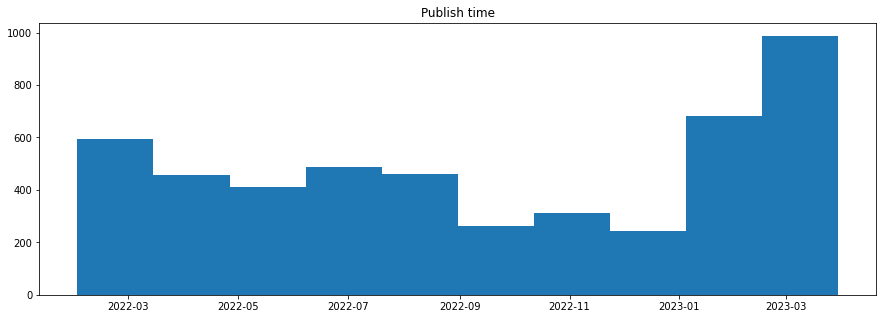

Plot of publish_time and text_length


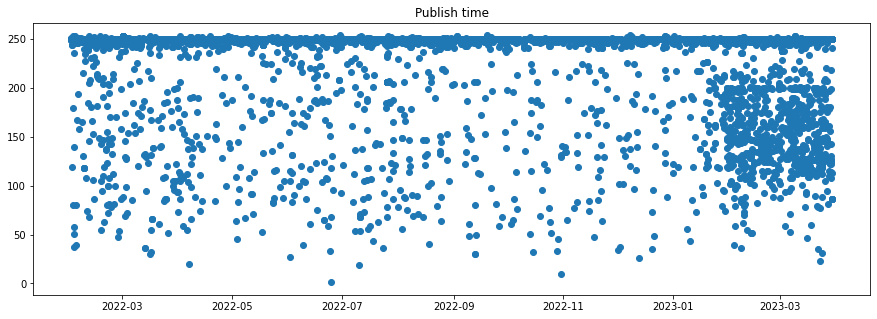

In [30]:
# Plotting the datetime publish_time
print('Histogram of publish_time')
plt.figure(figsize=(15, 5))
plt.title('Publish time')
plt.hist(df_report['publish_time'], bins=10)
plt.show()

print('Plot of publish_time and text_length')
plt.figure(figsize=(15, 5))
plt.title('Publish time')
plt.plot(df_report['publish_time'], df_report['text_length'], 'o')
plt.show()

In [31]:
# Investigating the text
# Calculate the number of occurrences of words from stopwords in the Article body
df_report['stopwords_count'] = df_report['Content'].apply(lambda x: len([word for word in x.split() if word.lower() in stopwords]))
print('Min stopwords count: ', df_report['stopwords_count'].min())
print('Max stopwords count: ', df_report['stopwords_count'].max())
print('Average stopwords count: ', df_report['stopwords_count'].mean())
display(df_report.head(3))

Min stopwords count:  0
Max stopwords count:  33
Average stopwords count:  12.093507554103716


,ID,Date,Hrs,Title,Content,Source,Domain,Category,Sentiment,publish_time,text_length,stopwords_count
11,69470691892,2023-03-30,05:32,Entlarvender Bericht: Meldung zu aufwändig – Ä...,Entlarvender Bericht: Meldung zu aufwändig – Ä...,https://diesituation.wordpress.com/2023/03/30/...,diesituation.wordpress.com,Blogs,0.0,2023-03-30 05:32:00,241,3
32,69468248231,2023-03-30,01:44,Wann kommen Medikamente gegen Long Covid?,"Aber was ist mit Therapien für Menschen, die n...",https://www.shz.de/lebenswelten/gesundheit-fit...,shz.de,News,0.0,2023-03-30 01:44:00,86,8
33,69468902109,2023-03-30,01:40,Spiel auf Zeit: Wann kommen Medikamente gegen ...,"Aber was ist mit Therapien für Menschen, die n...",https://www.ksta.de/ratgeber/dpa-ratgeber/wann...,ksta.de,News,0.0,2023-03-30 01:40:00,250,16


Histogram of stopwords_count


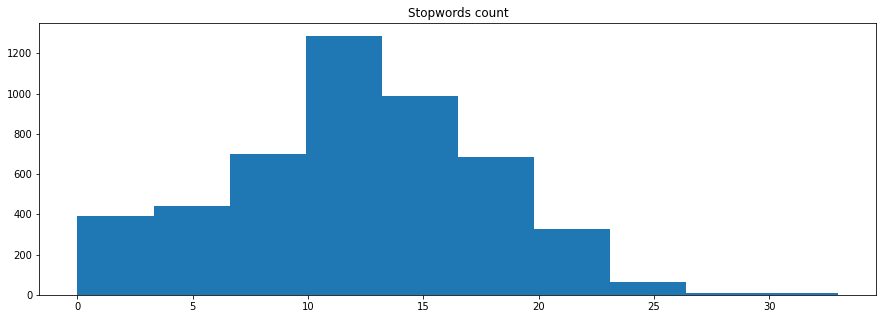

Plot of stopwords_count and text_length


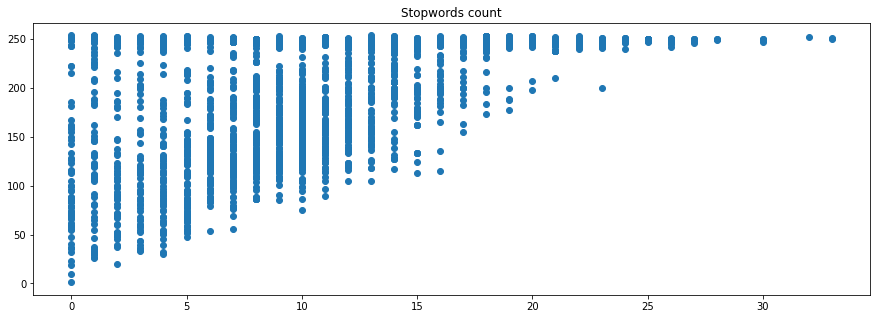

In [32]:
# Plotting the stopwords_count
print('Histogram of stopwords_count')
plt.figure(figsize=(15, 5))
plt.title('Stopwords count')
plt.hist(df_report['stopwords_count'], bins=10)
plt.show()

print('Plot of stopwords_count and text_length')
plt.figure(figsize=(15, 5))
plt.title('Stopwords count')
plt.plot(df_report['stopwords_count'], df_report['text_length'], 'o')
plt.show()

### Results for the report
After the small EDA we can see that:
- There are 11 columns totally
- Meaningfully columns are: 'Title', 'Content', 'Source', 'Domain', 'Category', 'Sentiment', 'publish_time', 'text_length', 'stopwords_count'
- The articles are published from 2023-02 to 2023-03
- There are 1530 sources of the articles, some of them combine several articles (ndr.de)
- The average length of the articles is about 250 symbols
- The average number of stopwords in the articles is about 10

## Example tweets analysis

In [2]:
# Install dependencies
import json

In [3]:
with open('long_covid2/twitter/long2/data_1616007985389510662.json', 'r') as f:
    data = json.load(f)

print(data)

[{'text': 'RT @ninifeebarbe: @BMG_Bund @Karl_Lauterbach Was wird konkret unternommen, um zu verhindern, dass unsere gesamte Gesellschaft über kurz ode…', 'referenced_tweets': [{'type': 'retweeted', 'id': '1615698704123445249'}], 'id': '1616027418782797824', 'lang': 'de', 'public_metrics': {'retweet_count': 10, 'reply_count': 0, 'like_count': 0, 'quote_count': 0, 'impression_count': 0}, 'created_at': '2023-01-19T10:58:55.000Z', 'entities': {'mentions': [{'start': 3, 'end': 16, 'username': 'ninifeebarbe', 'id': '75528347'}, {'start': 18, 'end': 27, 'username': 'BMG_Bund', 'id': '2478349112'}, {'start': 28, 'end': 44, 'username': 'Karl_Lauterbach', 'id': '3292982985'}], 'hashtags': {}, 'urls': {}}, 'author_id': '1359796402394714112', 'edit_history_tweet_ids': ['1616027418782797824'], 'conversation_id': '1616027418782797824', 'possibly_sensitive': False, 'attachments': {'media_keys': {}}}, {'text': 'RT @JanniLeh: Heute, stille Visualisierung vor dem Bundestag.\n#MECFS ist eine schwere neur

In [4]:
print(len(data))
print(data[0].keys())
print(data[0].keys() == data[1].keys())
print(all([data[a + 4].keys() == data[a+5].keys() for a in range(len(data)-13)]))
print(any([data[a].keys() == data[a+1].keys() for a in range(len(data)-1)]))
print(data[0], data[10], data[100], sep='\n')

500
dict_keys(['text', 'referenced_tweets', 'id', 'lang', 'public_metrics', 'created_at', 'entities', 'author_id', 'edit_history_tweet_ids', 'conversation_id', 'possibly_sensitive', 'attachments'])
True
False
True
{'text': 'RT @ninifeebarbe: @BMG_Bund @Karl_Lauterbach Was wird konkret unternommen, um zu verhindern, dass unsere gesamte Gesellschaft über kurz ode…', 'referenced_tweets': [{'type': 'retweeted', 'id': '1615698704123445249'}], 'id': '1616027418782797824', 'lang': 'de', 'public_metrics': {'retweet_count': 10, 'reply_count': 0, 'like_count': 0, 'quote_count': 0, 'impression_count': 0}, 'created_at': '2023-01-19T10:58:55.000Z', 'entities': {'mentions': [{'start': 3, 'end': 16, 'username': 'ninifeebarbe', 'id': '75528347'}, {'start': 18, 'end': 27, 'username': 'BMG_Bund', 'id': '2478349112'}, {'start': 28, 'end': 44, 'username': 'Karl_Lauterbach', 'id': '3292982985'}], 'hashtags': {}, 'urls': {}}, 'author_id': '1359796402394714112', 'edit_history_tweet_ids': ['161602741878279782

In [9]:
# Create a dataframe
df = pd.DataFrame(data)
display(df.head(3))

,text,referenced_tweets,id,lang,public_metrics,created_at,entities,author_id,edit_history_tweet_ids,conversation_id,possibly_sensitive,attachments,in_reply_to_user_id
0,RT @ninifeebarbe: @BMG_Bund @Karl_Lauterbach W...,"[{'type': 'retweeted', 'id': '1615698704123445...",1616027418782797824,de,"{'retweet_count': 10, 'reply_count': 0, 'like_...",2023-01-19T10:58:55.000Z,"{'mentions': [{'start': 3, 'end': 16, 'usernam...",1359796402394714112,[1616027418782797824],1616027418782797824,False,{'media_keys': {}},NaN
1,"RT @JanniLeh: Heute, stille Visualisierung vor...","[{'type': 'retweeted', 'id': '1616004345925111...",1616027415288872962,de,"{'retweet_count': 92, 'reply_count': 0, 'like_...",2023-01-19T10:58:54.000Z,"{'mentions': [{'start': 3, 'end': 12, 'usernam...",1126110549480288257,[1616027415288872962],1616027415288872962,False,{'media_keys': {}},NaN
2,RT @DrCWerner: Nun gibt es kein Naltrexon mehr...,"[{'type': 'retweeted', 'id': '1616021098184970...",1616027329142362114,de,"{'retweet_count': 557, 'reply_count': 0, 'like...",2023-01-19T10:58:34.000Z,"{'mentions': [{'start': 3, 'end': 13, 'usernam...",4255832955,[1616027329142362114],1616027329142362114,False,{'media_keys': {}},NaN


In [57]:
# Basic checks
df.isnull().sum()

text                        0
referenced_tweets           0
id                          0
lang                        0
public_metrics              0
created_at                  0
entities                    0
author_id                   0
edit_history_tweet_ids      0
conversation_id             0
possibly_sensitive          0
attachments                 0
in_reply_to_user_id       479
dtype: int64

In [60]:
# Language
print('Language:')
print(df['lang'].value_counts())

# Author id
print('Author id:')
print(df['author_id'].value_counts())

# Sensitivity
print('Sensitivity:')
print(df['possibly_sensitive'].value_counts())

# Attachments
print('Attachments:')
print(df['attachments'].value_counts())

Language:
de    500
Name: lang, dtype: int64
Author id:
1283081430017482756    23
1478436044055920642    19
1513634031279259656    19
1517836115532820480    17
1541743300683726848    13
                       ..
16958590                1
1097287757842599936     1
1461676800338243585     1
20508212                1
1203980889975332864     1
Name: author_id, Length: 257, dtype: int64
Sensitivity:
False    500
Name: possibly_sensitive, dtype: int64
Attachments:
{'media_keys': {}}                                                    479
{'media_keys': ['3_1616026340888551425']}                               1
{'media_keys': ['3_1616012516399669249', '3_1616012516395474944']}      1
{'media_keys': ['3_1616012979492851712']}                               1
{'media_keys': ['3_1616013558050873348']}                               1
{'media_keys': ['3_1616014139188453380']}                               1
{'media_keys': ['3_1616014893483790337']}                               1
{'media_keys': ['3_

In [8]:
## See the user json
with open('long_covid2/twitter/long2/users_1616354359029137408.json', 'r') as file:
    user_data = json.load(file)

print(user_data)

{'users': [{'url': 'https://t.co/lc5UyjYlGD', 'profile_image_url': 'https://pbs.twimg.com/profile_images/1491820236332572672/x3BL7xV4_normal.jpg', 'public_metrics': {'followers_count': 393, 'following_count': 641, 'tweet_count': 17565, 'listed_count': 2}, 'verified': False, 'username': 'Jahleesu', 'name': 'Jahlee Su 🦑', 'id': '878717378', 'protected': False, 'created_at': '2012-10-13T21:20:55.000Z', 'description': 'she/her, fae/faer (trying out); bi/asexual; ME/CFS, i mostly blog about disability, chronic illness and my dog ;)\njahleesu@mastodon.social', 'entities': {'url': {'urls': [{'start': 0, 'end': 23, 'url': 'https://t.co/lc5UyjYlGD', 'expanded_url': 'https://vm.tiktok.com/ZMLWCEj5u/', 'display_url': 'vm.tiktok.com/ZMLWCEj5u/'}]}, 'description': {'hashtags': {}, 'mentions': {}, 'urls': {}, 'cashtags': {}}}}, {'profile_image_url': 'https://pbs.twimg.com/profile_images/1581321464124526594/Z9Rgs7Kd_normal.jpg', 'public_metrics': {'followers_count': 803, 'following_count': 466, 'twee

In [13]:
# Visualize the user json
print(len(user_data))
print(user_data.keys())

3
dict_keys(['users', 'tweets', 'places'])


In [16]:
# Create a dataframe
df_users = pd.DataFrame(user_data['users'])
df_tweets = pd.DataFrame(user_data['tweets'])
df_places = pd.DataFrame(user_data['places'])
display(df_users.head(3))
display(df_tweets.head(3))
display(df_places.head(3))

,url,profile_image_url,public_metrics,verified,username,name,id,protected,created_at,description,entities,location,pinned_tweet_id
0,https://t.co/lc5UyjYlGD,https://pbs.twimg.com/profile_images/149182023...,"{'followers_count': 393, 'following_count': 64...",False,Jahleesu,Jahlee Su 🦑,878717378,False,2012-10-13T21:20:55.000Z,"she/her, fae/faer (trying out); bi/asexual; ME...","{'url': {'urls': [{'start': 0, 'end': 23, 'url...",NaN,NaN
1,NaN,https://pbs.twimg.com/profile_images/158132146...,"{'followers_count': 803, 'following_count': 46...",False,Ulrike_1985,Ulrike_longcovid_fighter,1512416713006100482,False,2022-04-08T13:07:08.000Z,FW Gesundheit- & Sozialwesen\nSPD Stadtverordn...,"{'url': {'urls': {}}, 'description': {'hashtag...","Hessen, Deutschland",1587474800762568705
2,NaN,https://pbs.twimg.com/profile_images/159971332...,"{'followers_count': 87, 'following_count': 25,...",False,Kocki62,bruno k,1598969805251526656,False,2022-12-03T09:18:17.000Z,"Corona, Klima, 9/11, Überbevölkerung, fossile ...","{'url': {'urls': {}}, 'description': {'hashtag...",NaN,1612511504498102272


,edit_history_tweet_ids,conversation_id,created_at,entities,attachments,id,author_id,public_metrics,possibly_sensitive,lang,text,referenced_tweets,in_reply_to_user_id
0,[1615992568432529408],1615992568432529408,2023-01-19T08:40:26.000Z,"{'urls': [{'start': 275, 'end': 298, 'url': 'h...",{'media_keys': ['3_1615992559007895554']},1615992568432529408,1512416713006100482,"{'retweet_count': 48, 'reply_count': 0, 'like_...",False,de,400 Betten. 400 Bilder. Stellvertretend für v...,{},NaN
1,[1615450341851664385],1615450341851664385,2023-01-17T20:45:49.000Z,"{'urls': [{'start': 217, 'end': 240, 'url': 'h...",{'media_keys': {}},1615450341851664385,1435074787261419522,"{'retweet_count': 24, 'reply_count': 2, 'like_...",False,de,#LongCovid könnte Neuseelands häufigste Ursach...,"[{'type': 'quoted', 'id': '1615083880847114241'}]",NaN
2,[1616379706571472901],1616379706571472901,2023-01-20T10:18:47.000Z,"{'urls': [{'start': 243, 'end': 266, 'url': 'h...",{'media_keys': {}},1616379706571472901,1376198405316304906,"{'retweet_count': 12, 'reply_count': 2, 'like_...",False,de,Endlich mal eine Berichterstattung beim #WDR z...,{},NaN


,geo,id,place_type,full_name,name,country_code,country
0,"{'type': 'Feature', 'bbox': [8.4727, 50.0155, ...",c589d9d6ed38927c,city,"Frankfurt am Main, Deutschland",Frankfurt am Main,DE,Deutschland


In [17]:
print(df_users.shape, df_tweets.shape, df_places.shape)

(469, 13) (161, 13) (1, 7)


### Some EDA

In [18]:
# Basic checks
df_users.isnull().sum()

url                  336
profile_image_url      0
public_metrics         0
verified               0
username               0
name                   0
id                     0
protected              0
created_at             0
description            0
entities               0
location             197
pinned_tweet_id      250
dtype: int64

In [22]:
# Combine all the data into one dataframe
final_json = []
for dirname, _, filenames in os.walk('long_covid2/twitter/long2'):
    for filename in filenames:
        if filename.startswith('data'):
            with open(os.path.join(dirname, filename), 'r') as file:
                temp_data = json.load(file)
                final_json.extend(temp_data)

print(len(final_json))

9991


In [23]:
# Create a dataframe
df = pd.DataFrame(final_json)
print(df.shape)
display(df.head(3))

(9991, 14)


,author_id,id,public_metrics,entities,conversation_id,referenced_tweets,edit_history_tweet_ids,possibly_sensitive,text,created_at,lang,attachments,in_reply_to_user_id,geo
0,824738297473798145,1616881568403841024,"{'retweet_count': 3, 'reply_count': 0, 'like_c...","{'hashtags': [{'start': 17, 'end': 28, 'tag': ...",1616881568403841024,"[{'type': 'retweeted', 'id': '1616778889493184...",[1616881568403841024],False,RT @RND_de: Karl #Lauterbach will #LongCovid-B...,2023-01-21T19:33:00.000Z,de,"{'media_keys': {}, 'poll_ids': {}}",NaN,NaN
1,1480093901167996928,1616881456516669441,"{'retweet_count': 267, 'reply_count': 0, 'like...","{'hashtags': [{'start': 45, 'end': 55, 'tag': ...",1616881456516669441,"[{'type': 'retweeted', 'id': '1616790512974839...",[1616881456516669441],False,RT @Karl_Lauterbach: Wir dürfen Menschen mit #...,2023-01-21T19:32:34.000Z,de,"{'media_keys': {}, 'poll_ids': {}}",NaN,NaN
2,908012044754006022,1616881429471956993,"{'retweet_count': 58, 'reply_count': 0, 'like_...","{'hashtags': [{'start': 118, 'end': 124, 'tag'...",1616881429471956993,"[{'type': 'retweeted', 'id': '1616785565743038...",[1616881429471956993],False,RT @GrandeBettina: Wann nennen Sie das Kind be...,2023-01-21T19:32:27.000Z,de,"{'media_keys': {}, 'poll_ids': {}}",NaN,NaN


In [33]:
# Basic checks
print(df.isnull().sum())

# Remove in_reply_to_user_id due to high number of missing values
df.drop('in_reply_to_user_id', axis=1, inplace=True)

print(df['geo'].value_counts())
# Remove geo column as well
df.drop('geo', axis=1, inplace=True)

print(df.isnull().sum())

author_id                    0
id                           0
public_metrics               0
entities                     0
conversation_id              0
referenced_tweets            0
edit_history_tweet_ids       0
possibly_sensitive           0
text                         0
created_at                   0
lang                         0
attachments                  0
geo                       5495
dtype: int64
{}                                  4483
{'place_id': 'c589d9d6ed38927c'}       5
{'place_id': '850bc3bbe283a01f'}       3
{'place_id': '3078869807f9dd36'}       2
{'place_id': '9f659d51e5c5deae'}       2
{'place_id': '3762f0997bd0c84b'}       1
Name: geo, dtype: int64
author_id                 0
id                        0
public_metrics            0
entities                  0
conversation_id           0
referenced_tweets         0
edit_history_tweet_ids    0
possibly_sensitive        0
text                      0
created_at                0
lang                      0
attach

In [34]:
df.head(3)

,author_id,id,public_metrics,entities,conversation_id,referenced_tweets,edit_history_tweet_ids,possibly_sensitive,text,created_at,lang,attachments
0,824738297473798145,1616881568403841024,"{'retweet_count': 3, 'reply_count': 0, 'like_c...","{'hashtags': [{'start': 17, 'end': 28, 'tag': ...",1616881568403841024,"[{'type': 'retweeted', 'id': '1616778889493184...",[1616881568403841024],False,RT @RND_de: Karl #Lauterbach will #LongCovid-B...,2023-01-21T19:33:00.000Z,de,"{'media_keys': {}, 'poll_ids': {}}"
1,1480093901167996928,1616881456516669441,"{'retweet_count': 267, 'reply_count': 0, 'like...","{'hashtags': [{'start': 45, 'end': 55, 'tag': ...",1616881456516669441,"[{'type': 'retweeted', 'id': '1616790512974839...",[1616881456516669441],False,RT @Karl_Lauterbach: Wir dürfen Menschen mit #...,2023-01-21T19:32:34.000Z,de,"{'media_keys': {}, 'poll_ids': {}}"
2,908012044754006022,1616881429471956993,"{'retweet_count': 58, 'reply_count': 0, 'like_...","{'hashtags': [{'start': 118, 'end': 124, 'tag'...",1616881429471956993,"[{'type': 'retweeted', 'id': '1616785565743038...",[1616881429471956993],False,RT @GrandeBettina: Wann nennen Sie das Kind be...,2023-01-21T19:32:27.000Z,de,"{'media_keys': {}, 'poll_ids': {}}"


In [36]:
# Author id
print('Author id:')
print(df['author_id'].value_counts())
print('\n\n')

# Sensitivity
print('Sensitivity:')
print(df['possibly_sensitive'].value_counts())
print('\n\n')

# Language
print('Language:')
print(df['lang'].value_counts())
print('\n\n')

# Attachments
print('Attachments:')
print(df['attachments'].value_counts())

Author id:
1283081430017482756    169
1541743300683726848    106
1161519036255088640     70
1115385542              69
1542874528010960897     54
                      ... 
1556888418466021380      1
264302334                1
1483184927239774213      1
464644581                1
1603806027505451025      1
Name: author_id, Length: 3723, dtype: int64



Sensitivity:
False    9949
True       42
Name: possibly_sensitive, dtype: int64



Language:
de    9991
Name: lang, dtype: int64



Attachments:
{'media_keys': {}}                                                    7808
{'media_keys': {}, 'poll_ids': {}}                                    1941
{'media_keys': {}, 'poll_ids': ['1616826754533937152']}                 10
{'media_keys': ['3_1616355801660014593', '3_1616355807062380544']}       7
{'media_keys': ['3_1616117038472208384']}                                7
                                                                      ... 
{'media_keys': ['3_1616312754100371457']}         

In [45]:
# Investigat public_metrics
print(df['public_metrics'].head(3))

# Extract the public_metrics column as a list of JSON strings
public_metrics = df['public_metrics'].tolist()
print('Length:', len(public_metrics))

# Parse the JSON strings and extract the desired values
data = []
for metrics in public_metrics:
    metrics_dict = json.loads(str(metrics).replace("'", '"'))
    data.append({
        'like_count': metrics_dict['like_count'],
        'reply_count': metrics_dict['reply_count'],
        'retweet_count': metrics_dict['retweet_count'],
        'quote_count': metrics_dict['quote_count']
    })

# Create a new DataFrame with the extracted values
metrics_df = pd.DataFrame(data)

# Print the new DataFrame
print('Shape:', metrics_df.shape)
display(metrics_df.head())

0    {'retweet_count': 3, 'reply_count': 0, 'like_c...
1    {'retweet_count': 267, 'reply_count': 0, 'like...
2    {'retweet_count': 58, 'reply_count': 0, 'like_...
Name: public_metrics, dtype: object
Length: 9991
Shape: (9991, 4)


,like_count,reply_count,retweet_count,quote_count
0,0,0,3,0
1,0,0,267,0
2,0,0,58,0
3,0,0,58,0
4,0,0,58,0


In [46]:
metrics_df.describe()

,like_count,reply_count,retweet_count,quote_count
count,9991.000000,9991.000000,9991.000000,9991.000000
mean,4.413872,0.432790,105.366930,0.063757
std,44.902398,16.736737,155.824844,1.673870
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,10.000000,0.000000
50%,0.000000,0.000000,37.000000,0.000000
75%,0.000000,0.000000,121.000000,0.000000
max,2093.000000,1591.000000,1426.000000,129.000000


In [56]:
# Investigate the entities column
print(df['entities'].head(3))

# Extract the entities column as a list of JSON strings
entities = df['entities'].tolist()
print('Length:', len(entities))

# Parse the JSON strings and extract the desired values
data = []
for entity in entities:
    entity_dict = json.loads(json.dumps(entity))
    data.append({
        'hashtags': entity_dict['hashtags'],
        'urls': entity_dict['urls'],
        'mentions': entity_dict['mentions']
    })

# Create a new DataFrame with the extracted values
entities_df = pd.DataFrame(data)

# Print the new DataFrame
print('Shape:', entities_df.shape)
display(entities_df.head())

0    {'hashtags': [{'start': 17, 'end': 28, 'tag': ...
1    {'hashtags': [{'start': 45, 'end': 55, 'tag': ...
2    {'hashtags': [{'start': 118, 'end': 124, 'tag'...
Name: entities, dtype: object
Length: 9991
Shape: (9991, 3)


,hashtags,urls,mentions
0,"[{'start': 17, 'end': 28, 'tag': 'Lauterbach'}...",{},"[{'start': 3, 'end': 10, 'username': 'RND_de',..."
1,"[{'start': 45, 'end': 55, 'tag': 'LongCovid'}]",{},"[{'start': 3, 'end': 19, 'username': 'Karl_Lau..."
2,"[{'start': 118, 'end': 124, 'tag': 'MECFS'}]",{},"[{'start': 3, 'end': 17, 'username': 'GrandeBe..."
3,"[{'start': 118, 'end': 124, 'tag': 'MECFS'}]",{},"[{'start': 3, 'end': 17, 'username': 'GrandeBe..."
4,"[{'start': 118, 'end': 124, 'tag': 'MECFS'}]",{},"[{'start': 3, 'end': 17, 'username': 'GrandeBe..."


In [58]:
print(entities_df['urls'].value_counts())

{}                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

### Content investigation

In [66]:
# Stopwords
with open('stopwords-de.txt', 'r') as f:
    stopwords = f.read().splitlines()

if len(stopwords) != len(set(stopwords)):
    print('There are duplicates in the stopwords list')
else:
    print('There are no duplicates in the stopwords list')

print('Number of stopwords: ', len(stopwords))

stopwords = [word.lower() for word in stopwords]

There are no duplicates in the stopwords list
Number of stopwords:  620


In [67]:
# Investigate the text
display(df.head(3))

# Count the length of each tweet
df['text_length'] = df['text'].apply(lambda x: len(x))

# Count number of stopwords in each tweet
df['stopwords_count'] = df['text'].apply(lambda x: len([word for word in x.split() if word.lower() in stopwords]))

display(df.head(3))


,author_id,id,public_metrics,entities,conversation_id,referenced_tweets,edit_history_tweet_ids,possibly_sensitive,text,created_at,lang,attachments
0,824738297473798145,1616881568403841024,"{'retweet_count': 3, 'reply_count': 0, 'like_c...","{'hashtags': [{'start': 17, 'end': 28, 'tag': ...",1616881568403841024,"[{'type': 'retweeted', 'id': '1616778889493184...",[1616881568403841024],False,RT @RND_de: Karl #Lauterbach will #LongCovid-B...,2023-01-21T19:33:00.000Z,de,"{'media_keys': {}, 'poll_ids': {}}"
1,1480093901167996928,1616881456516669441,"{'retweet_count': 267, 'reply_count': 0, 'like...","{'hashtags': [{'start': 45, 'end': 55, 'tag': ...",1616881456516669441,"[{'type': 'retweeted', 'id': '1616790512974839...",[1616881456516669441],False,RT @Karl_Lauterbach: Wir dürfen Menschen mit #...,2023-01-21T19:32:34.000Z,de,"{'media_keys': {}, 'poll_ids': {}}"
2,908012044754006022,1616881429471956993,"{'retweet_count': 58, 'reply_count': 0, 'like_...","{'hashtags': [{'start': 118, 'end': 124, 'tag'...",1616881429471956993,"[{'type': 'retweeted', 'id': '1616785565743038...",[1616881429471956993],False,RT @GrandeBettina: Wann nennen Sie das Kind be...,2023-01-21T19:32:27.000Z,de,"{'media_keys': {}, 'poll_ids': {}}"


,author_id,id,public_metrics,entities,conversation_id,referenced_tweets,edit_history_tweet_ids,possibly_sensitive,text,created_at,lang,attachments,text_length,stopwords_count
0,824738297473798145,1616881568403841024,"{'retweet_count': 3, 'reply_count': 0, 'like_c...","{'hashtags': [{'start': 17, 'end': 28, 'tag': ...",1616881568403841024,"[{'type': 'retweeted', 'id': '1616778889493184...",[1616881568403841024],False,RT @RND_de: Karl #Lauterbach will #LongCovid-B...,2023-01-21T19:33:00.000Z,de,"{'media_keys': {}, 'poll_ids': {}}",140,6
1,1480093901167996928,1616881456516669441,"{'retweet_count': 267, 'reply_count': 0, 'like...","{'hashtags': [{'start': 45, 'end': 55, 'tag': ...",1616881456516669441,"[{'type': 'retweeted', 'id': '1616790512974839...",[1616881456516669441],False,RT @Karl_Lauterbach: Wir dürfen Menschen mit #...,2023-01-21T19:32:34.000Z,de,"{'media_keys': {}, 'poll_ids': {}}",140,13
2,908012044754006022,1616881429471956993,"{'retweet_count': 58, 'reply_count': 0, 'like_...","{'hashtags': [{'start': 118, 'end': 124, 'tag'...",1616881429471956993,"[{'type': 'retweeted', 'id': '1616785565743038...",[1616881429471956993],False,RT @GrandeBettina: Wann nennen Sie das Kind be...,2023-01-21T19:32:27.000Z,de,"{'media_keys': {}, 'poll_ids': {}}",140,6


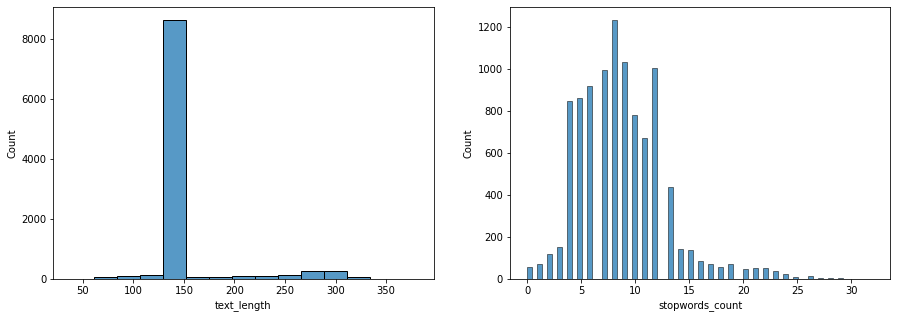

,text_length,stopwords_count
count,9991.000000,9991.000000
mean,151.831849,8.761986
std,41.464646,4.026837
min,38.000000,0.000000
25%,140.000000,6.000000
50%,140.000000,8.000000
75%,140.000000,11.000000
max,380.000000,32.000000


In [69]:
# Plot the text length and stopwords count
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df['text_length'], ax=ax[0])
sns.histplot(df['stopwords_count'], ax=ax[1])
plt.show()

# Describe the text length and stopwords count
display(df[['text_length', 'stopwords_count']].describe())

### Results for the tweets
The tweeter data is more diverse in comparison to previous articles data. 
There are several meaningfull columns, and some of them are presented in json format and have additional meaningfull information.
The data seems to be more noisy, so it needs more preprocessing. But it is more actual and has more information, so for DL it should be better.